# **Algo-7 : Elasticnet Regression**

# Step-1 : Bussiness Problem Understnading

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Step-2 : Data Understanding

In [23]:
df = pd.read_excel("insurance.xlsx")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


**Data Understanding**

In [25]:
df.shape

(1338, 7)

# Step-3 : Data Preprocessing

In [27]:
df.drop_duplicates(inplace=True)

In [29]:
df = pd.get_dummies(df,drop_first=True)

In [31]:
X = df.drop('expenses', axis=1)
y = df['expenses']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [45]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1332,52,44.7,3,False,False,False,False,True
666,49,28.7,1,True,False,False,False,True
1155,36,22.1,3,False,False,False,False,False
619,55,37.1,0,False,False,False,False,True
9,60,25.8,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...
56,58,31.8,2,False,False,False,False,False
501,43,26.0,0,True,False,False,False,False
639,56,33.7,4,True,False,False,True,False
348,36,29.9,1,False,False,False,True,False


# **Step-4 : Modelling**n

**Applying Hyperparameter tuning fo ElasticNet Regression**

In [49]:
from sklearn.model_selection import GridSearchCV

#model
from sklearn. linear_model import ElasticNet

estimator = ElasticNet()

# parameters & values
param_grid = {"alpha":list(range(1,101)),
               "l1_ratio": [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}      # It will try a total of 1000 combinations(100x10)

#Identifying the best value of the parameter within given values for the given data
model_hp = GridSearchCV(estimator,param_grid, cv=5, scoring='r2')
model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 91, 'l1_ratio': 1}

**Modelling the Elastinet regression using best hyperparameters**

In [52]:
enr_best = ElasticNet(alpha=91,l1_ratio=1)
enr_best.fit(X_train,y_train)

print("Intercept:", enr_best.intercept_)
print("coefficients:", enr_best.coef_)

ypred_train = enr_best.predict(X_train)
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CV Score:", cross_val_score(enr_best,X_train,y_train, cv=5).mean())

ypred_test = enr_best.predict(X_test)
print("Test R2:",r2_score(y_test,ypred_test))

Intercept: -11964.522394972553
coefficients: [  264.25851927   316.51480451   353.70999239    -0.
 23438.92211153     0.            -0.            -0.        ]
Train R2: 0.7590022152855
CV Score: 0.7535403926375602
Test R2: 0.7009476425484661


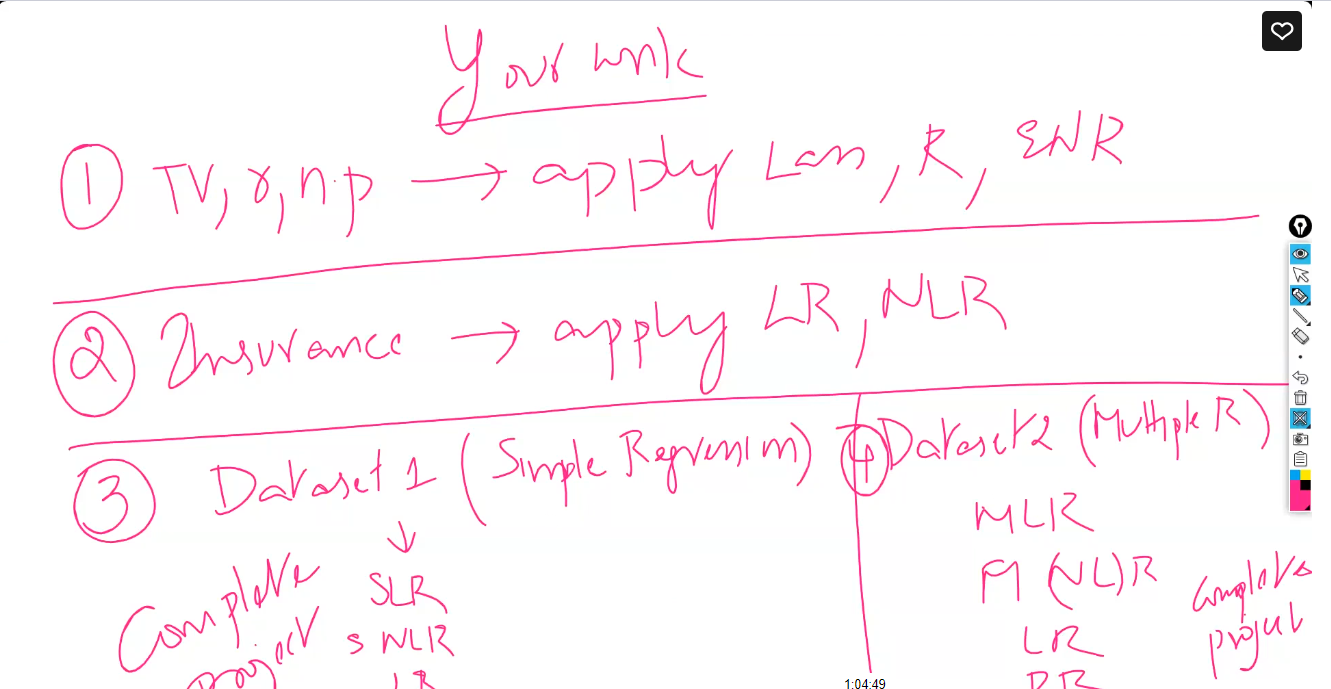